In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})
# plt.tight_layout(rect=[0, 0.03, 1, 0.85])

### Movielens number of iteration

In [47]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_movielens.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_movielens.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_movielens.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_movielens.csv')

In [48]:
df_lin_det.shape, df_lin_agg.shape

((1600, 5), (40, 5))

In [49]:
df_softmax_det.shape, df_softmax_agg.shape

((1600, 5), (40, 5))

In [8]:
df_lin_det.columns, df_lin_agg.columns

(Index(['dimension', 'num_prod', 'run', 'iters_to_NE', 'NE'], dtype='object'),
 Index(['dimension', 'num_prod', 'mean_iter_to_NE', 'std_iters_to_NE',
        'number_of_uniqueNE'],
       dtype='object'))

In [19]:
group_key = ['dimension', 'num_prod']
cols = group_key + ['iters_to_NE'] 
df_lin_stats = df_lin_det[cols].groupby(group_key).describe().reset_index()

In [25]:
np.all(df_lin_stats[('iters_to_NE',  'mean')] == df_lin_agg['mean_iter_to_NE'])

True

In [29]:
df_5dim_10prod = df_lin_det[(df_lin_det['dimension'] == 5) &  (df_lin_det['num_prod'] == 10)]

In [30]:
df_5dim_10prod['iters_to_NE'].describe()

count    20.000000
mean      3.550000
std       1.356272
min       1.000000
25%       3.000000
50%       3.000000
75%       4.250000
max       6.000000
Name: iters_to_NE, dtype: float64

In [31]:
df_5dim_10prod_agg = df_lin_agg[(df_lin_agg['dimension'] == 5) &  (df_lin_agg['num_prod'] == 10)]

In [34]:
df_d_agg = df_lin_agg[df_lin_agg['dimension'] == 5]
df_d_agg

,dimension,num_prod,mean_iter_to_NE,std_iters_to_NE,number_of_uniqueNE
0,5,10,3.55,1.321930,1
1,5,20,5.90,2.278157,1
2,5,30,8.90,2.233831,1
3,5,40,11.55,2.710627,1
4,5,50,13.65,3.482456,1
5,5,60,15.55,3.980892,1
6,5,70,18.45,4.609501,1
7,5,80,18.60,4.211888,1
8,5,90,22.00,5.656854,1
9,5,100,24.20,6.046487,1


In [11]:
df_lin_agg[df_lin_agg['dimension'] == 5]

,dimension,num_prod,mean_iter_to_NE,std_iters_to_NE,number_of_uniqueNE
0,5,10,3.250,1.355544,1
1,5,20,5.025,1.767590,1
2,5,30,6.700,2.293469,1
3,5,40,8.650,2.894391,1
4,5,50,10.600,3.345146,1
5,5,60,10.200,3.782856,1
6,5,70,13.400,3.923009,1
7,5,80,14.450,4.159026,1
8,5,90,19.000,5.074446,1
9,5,100,17.475,4.748618,1


#### Plot for how increasing the number of producers  across dimensions increases the number of iterations

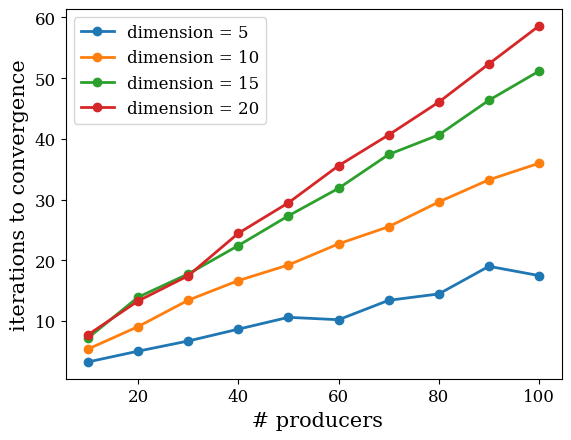

In [50]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_movielens.pdf', bbox_inches='tight')

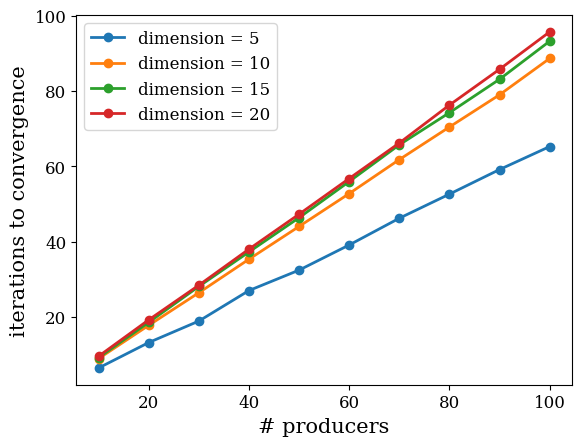

In [51]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_movielens.pdf', bbox_inches='tight')

### Uniform dataset number of iteration

In [53]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_uniform_seed17.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_uniform_seed17.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_uniform_seed17.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_uniform_seed17.csv')

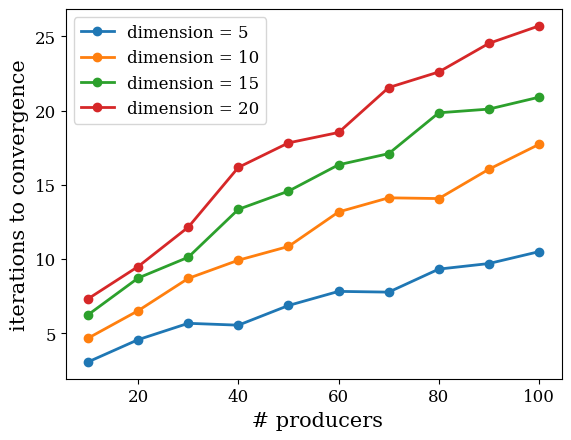

In [55]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_uniform_dataset.pdf', bbox_inches='tight')

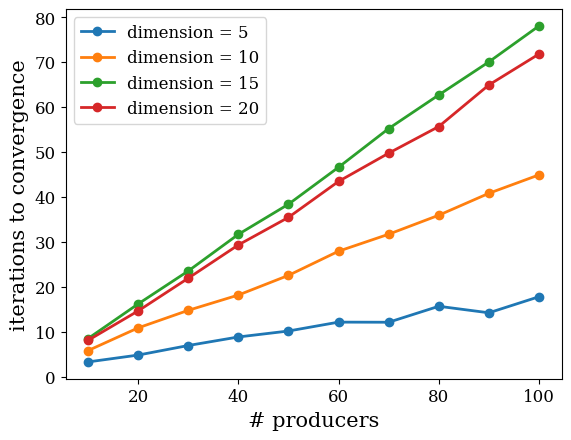

In [56]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_uniform_dataset.pdf', bbox_inches='tight')

### Skewed dataset number of iteration

In [58]:
df_lin_det = pd.read_csv('../csv_results/linear_detailed_40runs_weighted_seed17.csv')
df_lin_agg = pd.read_csv('../csv_results/linear_aggr_40runs_weighted_seed17.csv')

df_softmax_det = pd.read_csv('../csv_results/softmax_detailed_40runs_weighted_seed17.csv')
df_softmax_agg = pd.read_csv('../csv_results/softmax_aggr_40runs_weighted_seed17.csv')

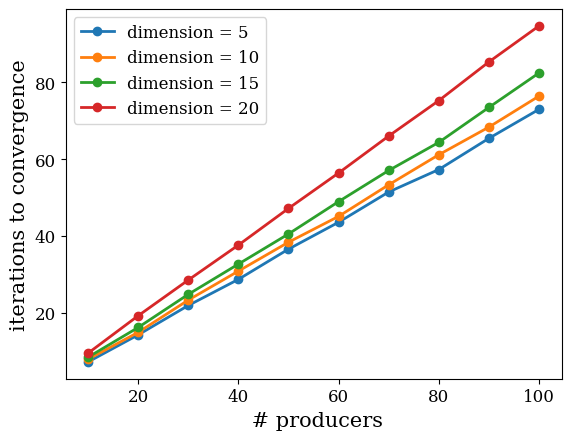

In [59]:
dims = df_lin_agg['dimension'].unique()
plt.xlabel(' # producers')
plt.ylabel('iterations to convergence') # linear pr
for d in dims:
  df_d_agg = df_lin_agg[df_lin_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")

plt.savefig('num_iter_linear_weighted_dataset.pdf', bbox_inches='tight')

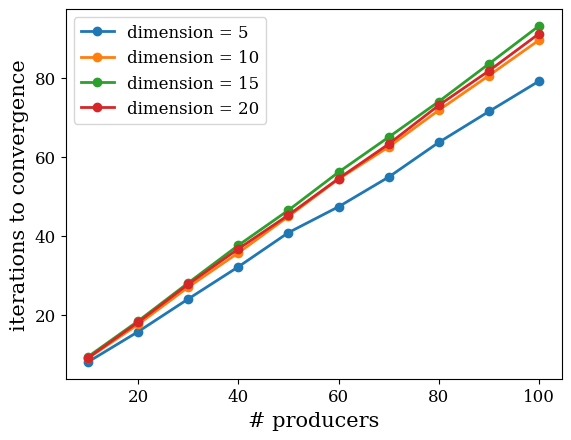

In [60]:
dims = df_softmax_agg['dimension'].unique()
plt.xlabel('# producers')
plt.ylabel('iterations to convergence')

for d in dims:
  df_d_agg = df_softmax_agg[df_softmax_agg['dimension'] == d]
  plt.plot(df_d_agg['num_prod'], df_d_agg['mean_iter_to_NE'], '-o', label = f'dimension = {d}')
plt.legend(loc="upper left")
plt.savefig('num_iter_softmax_weighted_dataset.pdf', bbox_inches='tight')